# 1. Preparing Libraries & Datasets

### 1.1 importing all the libraries here

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from scipy.stats import skew, kurtosis
from statistics import mode

import gc
import os
import warnings
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk import ngrams
from collections import Counter
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\google\protobuf\descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from google.protobuf.pyext import _message


In [2]:
pyLDAvis.enable_notebook()
np.random.seed(2019)
warnings.filterwarnings('ignore')

### 1.2 Loading the Datasets

In [3]:
sample = pd.read_csv('sample_submission.csv')
sample.head(3)

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,...,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308
1,46,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,...,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448
2,70,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,...,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


**First have a look at what we need to predict here.**

In [6]:
train['answer_user_page'].value_counts()

https://tex.stackexchange.com/users/4427               17
https://graphicdesign.stackexchange.com/users/3270     16
https://magento.stackexchange.com/users/146            15
https://electronics.stackexchange.com/users/20218      14
https://mechanics.stackexchange.com/users/4152         11
                                                       ..
https://apple.stackexchange.com/users/93229             1
https://stats.stackexchange.com/users/17359             1
https://gamedev.stackexchange.com/users/30331           1
https://graphicdesign.stackexchange.com/users/18111     1
https://mechanics.stackexchange.com/users/7534          1
Name: answer_user_page, Length: 4430, dtype: int64

In [7]:
target_columns = sample.columns.values[1:].tolist()
target_columns

['question_asker_intent_understanding',
 'question_body_critical',
 'question_conversational',
 'question_expect_short_answer',
 'question_fact_seeking',
 'question_has_commonly_accepted_answer',
 'question_interestingness_others',
 'question_interestingness_self',
 'question_multi_intent',
 'question_not_really_a_question',
 'question_opinion_seeking',
 'question_type_choice',
 'question_type_compare',
 'question_type_consequence',
 'question_type_definition',
 'question_type_entity',
 'question_type_instructions',
 'question_type_procedure',
 'question_type_reason_explanation',
 'question_type_spelling',
 'question_well_written',
 'answer_helpful',
 'answer_level_of_information',
 'answer_plausible',
 'answer_relevance',
 'answer_satisfaction',
 'answer_type_instructions',
 'answer_type_procedure',
 'answer_type_reason_explanation',
 'answer_well_written']

And now have a look at what we have in test dataset.

In [8]:
feature_columns = test.columns.values[1:].tolist()
feature_columns

['question_title',
 'question_body',
 'question_user_name',
 'question_user_page',
 'answer',
 'answer_user_name',
 'answer_user_page',
 'url',
 'category',
 'host']

 - Even I haven't looked into the data, I'd like to think that user names, user pages, urls, categories and hosts are not really helpful. So I will only look into `question_title`, `question_body` and `answer` columns.

# 2. EDA

### 2.1 EDA upon Feature Columns

#### 2.1.1 Distribution of Column `question_title`

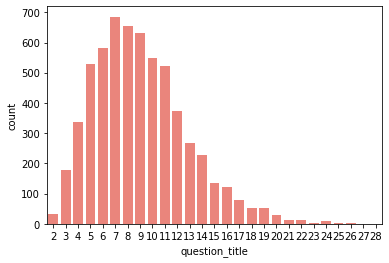

In [9]:
lengths = train['question_title'].apply(lambda x: len(x) - len(''.join(x.split())) + 1)
sns.countplot(lengths, color='#fc766a')
plt.show()

In [10]:
min(lengths), max(lengths), np.mean(lengths),np.median(lengths)

(2, 28, 9.03602566211548, 9.0)

In [11]:
skew(lengths), kurtosis(lengths)

(0.8034076508349522, 0.8638064608673863)

#### 2.1.2 Distribution of Question & Answer Body

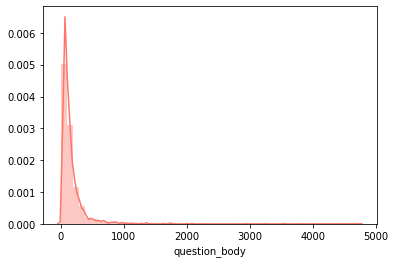

In [12]:
q_lengths = train['question_body'].apply(lambda x: len(x) - len(''.join(x.split())) + 1)
sns.distplot(q_lengths, color='#fc766a')
plt.show()

In [13]:
sum(q_lengths>1000), sum(q_lengths>500)

(76, 283)

In [14]:
min(q_lengths), max(q_lengths), np.mean(q_lengths),np.median(q_lengths), mode(q_lengths)

(2, 4735, 165.75341339036027, 101.0, 55)

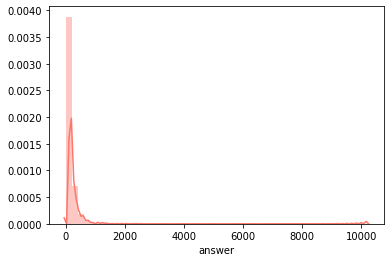

In [15]:
a_lengths = train['answer'].apply(lambda x: len(x) - len(''.join(x.split())) + 1)
sns.distplot(a_lengths, color='#fc766a')
plt.show()

In [16]:
min(a_lengths), max(a_lengths), np.mean(a_lengths),np.median(a_lengths)

(4, 10189, 156.92416515874322, 100.0)

#### 2.1.3 Ngram Analysis

I skip this part. Not much insights here.

### 2.2 EDA upon Target Columns

#### 2.2.1 Distribution of  `question_asker_intent_understanding`

If the answer is right for what question asker asked?

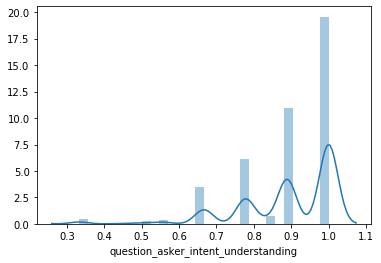

In [17]:
sns.distplot(train['question_asker_intent_understanding'])

In [18]:
train['question_asker_intent_understanding'].value_counts()

1.000000    2833
0.888889    1579
0.777778     883
0.666667     503
0.833333     108
0.333333      68
0.555556      60
0.500000      33
0.444444      12
Name: question_asker_intent_understanding, dtype: int64

#### 2.2.2 Distribution of `question_body_critical`

In [19]:
train['question_body_critical'].value_counts()

0.333333    1506
0.555556     932
0.444444     893
0.666667     845
0.777778     701
1.000000     583
0.888889     470
0.500000      94
0.833333      55
Name: question_body_critical, dtype: int64

#### 2.2.3 others

In [20]:
train['question_conversational'].value_counts()

0.000000    5409
0.333333     384
0.666667     152
1.000000     104
0.500000      30
Name: question_conversational, dtype: int64

In [21]:
CORR = train[['question_asker_intent_understanding',
 'question_body_critical',
 'question_conversational',
 'question_expect_short_answer',
 'question_fact_seeking',
 'question_has_commonly_accepted_answer',
 'question_interestingness_others',
 'question_interestingness_self',
 'question_multi_intent',
 'question_not_really_a_question',
 'question_opinion_seeking',
 'question_type_choice',
 'question_type_compare',
 'question_type_consequence',
 'question_type_definition',
 'question_type_entity',
 'question_type_instructions',
 'question_type_procedure',
 'question_type_reason_explanation',
 'question_type_spelling',
 'question_well_written',
 'answer_helpful',
 'answer_level_of_information',
 'answer_plausible',
 'answer_relevance',
 'answer_satisfaction',
 'answer_type_instructions',
 'answer_type_procedure',
 'answer_type_reason_explanation',
 'answer_well_written']]

In [22]:
CORR.corr()

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
question_asker_intent_understanding,1.000000,0.248283,0.069147,0.115719,-0.119989,-0.042387,0.041985,0.235507,-0.055113,-0.060497,...,0.271778,0.153192,0.036220,0.173906,0.061022,0.080308,-0.069215,-0.052325,-0.044156,0.115094
question_body_critical,0.248283,1.000000,0.134744,0.110006,0.017156,-0.053809,0.210505,0.191975,-0.130574,-0.052097,...,0.388172,-0.067796,0.075048,-0.043678,-0.016369,0.002452,-0.213847,-0.069160,0.004631,0.031500
question_conversational,0.069147,0.134744,1.000000,-0.092885,-0.412059,-0.407895,0.157942,0.201555,0.007646,0.041618,...,0.153880,-0.041928,0.010218,-0.028974,-0.023719,-0.035357,-0.242021,-0.084374,0.094524,0.047198
question_expect_short_answer,0.115719,0.110006,-0.092885,1.000000,-0.090800,0.326959,-0.038257,-0.160279,-0.227785,-0.006587,...,-0.123483,0.095115,0.097480,0.048566,0.090170,0.129107,0.064498,-0.180461,-0.071567,0.044827
question_fact_seeking,-0.119989,0.017156,-0.412059,-0.090800,1.000000,0.276906,-0.037801,0.008593,0.087934,-0.072354,...,0.103997,-0.113108,-0.049916,-0.125093,-0.078836,-0.052860,-0.057832,0.154646,0.066530,-0.145880
question_has_commonly_accepted_answer,-0.042387,-0.053809,-0.407895,0.326959,0.276906,1.000000,-0.180362,-0.342036,-0.086416,-0.033874,...,-0.246961,0.049203,0.020669,0.029065,0.051689,0.097280,0.186435,-0.006229,-0.023365,-0.086773
question_interestingness_others,0.041985,0.210505,0.157942,-0.038257,-0.037801,-0.180362,1.000000,0.572152,0.045346,-0.006038,...,0.189953,-0.046859,0.032855,-0.014504,-0.001221,-0.027452,-0.163019,-0.090484,0.097320,0.075336
question_interestingness_self,0.235507,0.191975,0.201555,-0.160279,0.008593,-0.342036,0.572152,1.000000,0.034488,0.003517,...,0.370318,-0.015698,-0.014285,0.028280,-0.033675,-0.030369,-0.227690,-0.095363,0.053524,0.120144
question_multi_intent,-0.055113,-0.130574,0.007646,-0.227785,0.087934,-0.086416,0.045346,0.034488,1.000000,-0.053477,...,0.079219,-0.053220,-0.044616,-0.033249,-0.032248,-0.091863,-0.147953,0.042438,0.201272,0.005128
question_not_really_a_question,-0.060497,-0.052097,0.041618,-0.006587,-0.072354,-0.033874,-0.006038,0.003517,-0.053477,1.000000,...,-0.062662,-0.010764,-0.002241,-0.018679,-0.029404,-0.018078,0.015343,-0.021567,-0.000347,0.011294


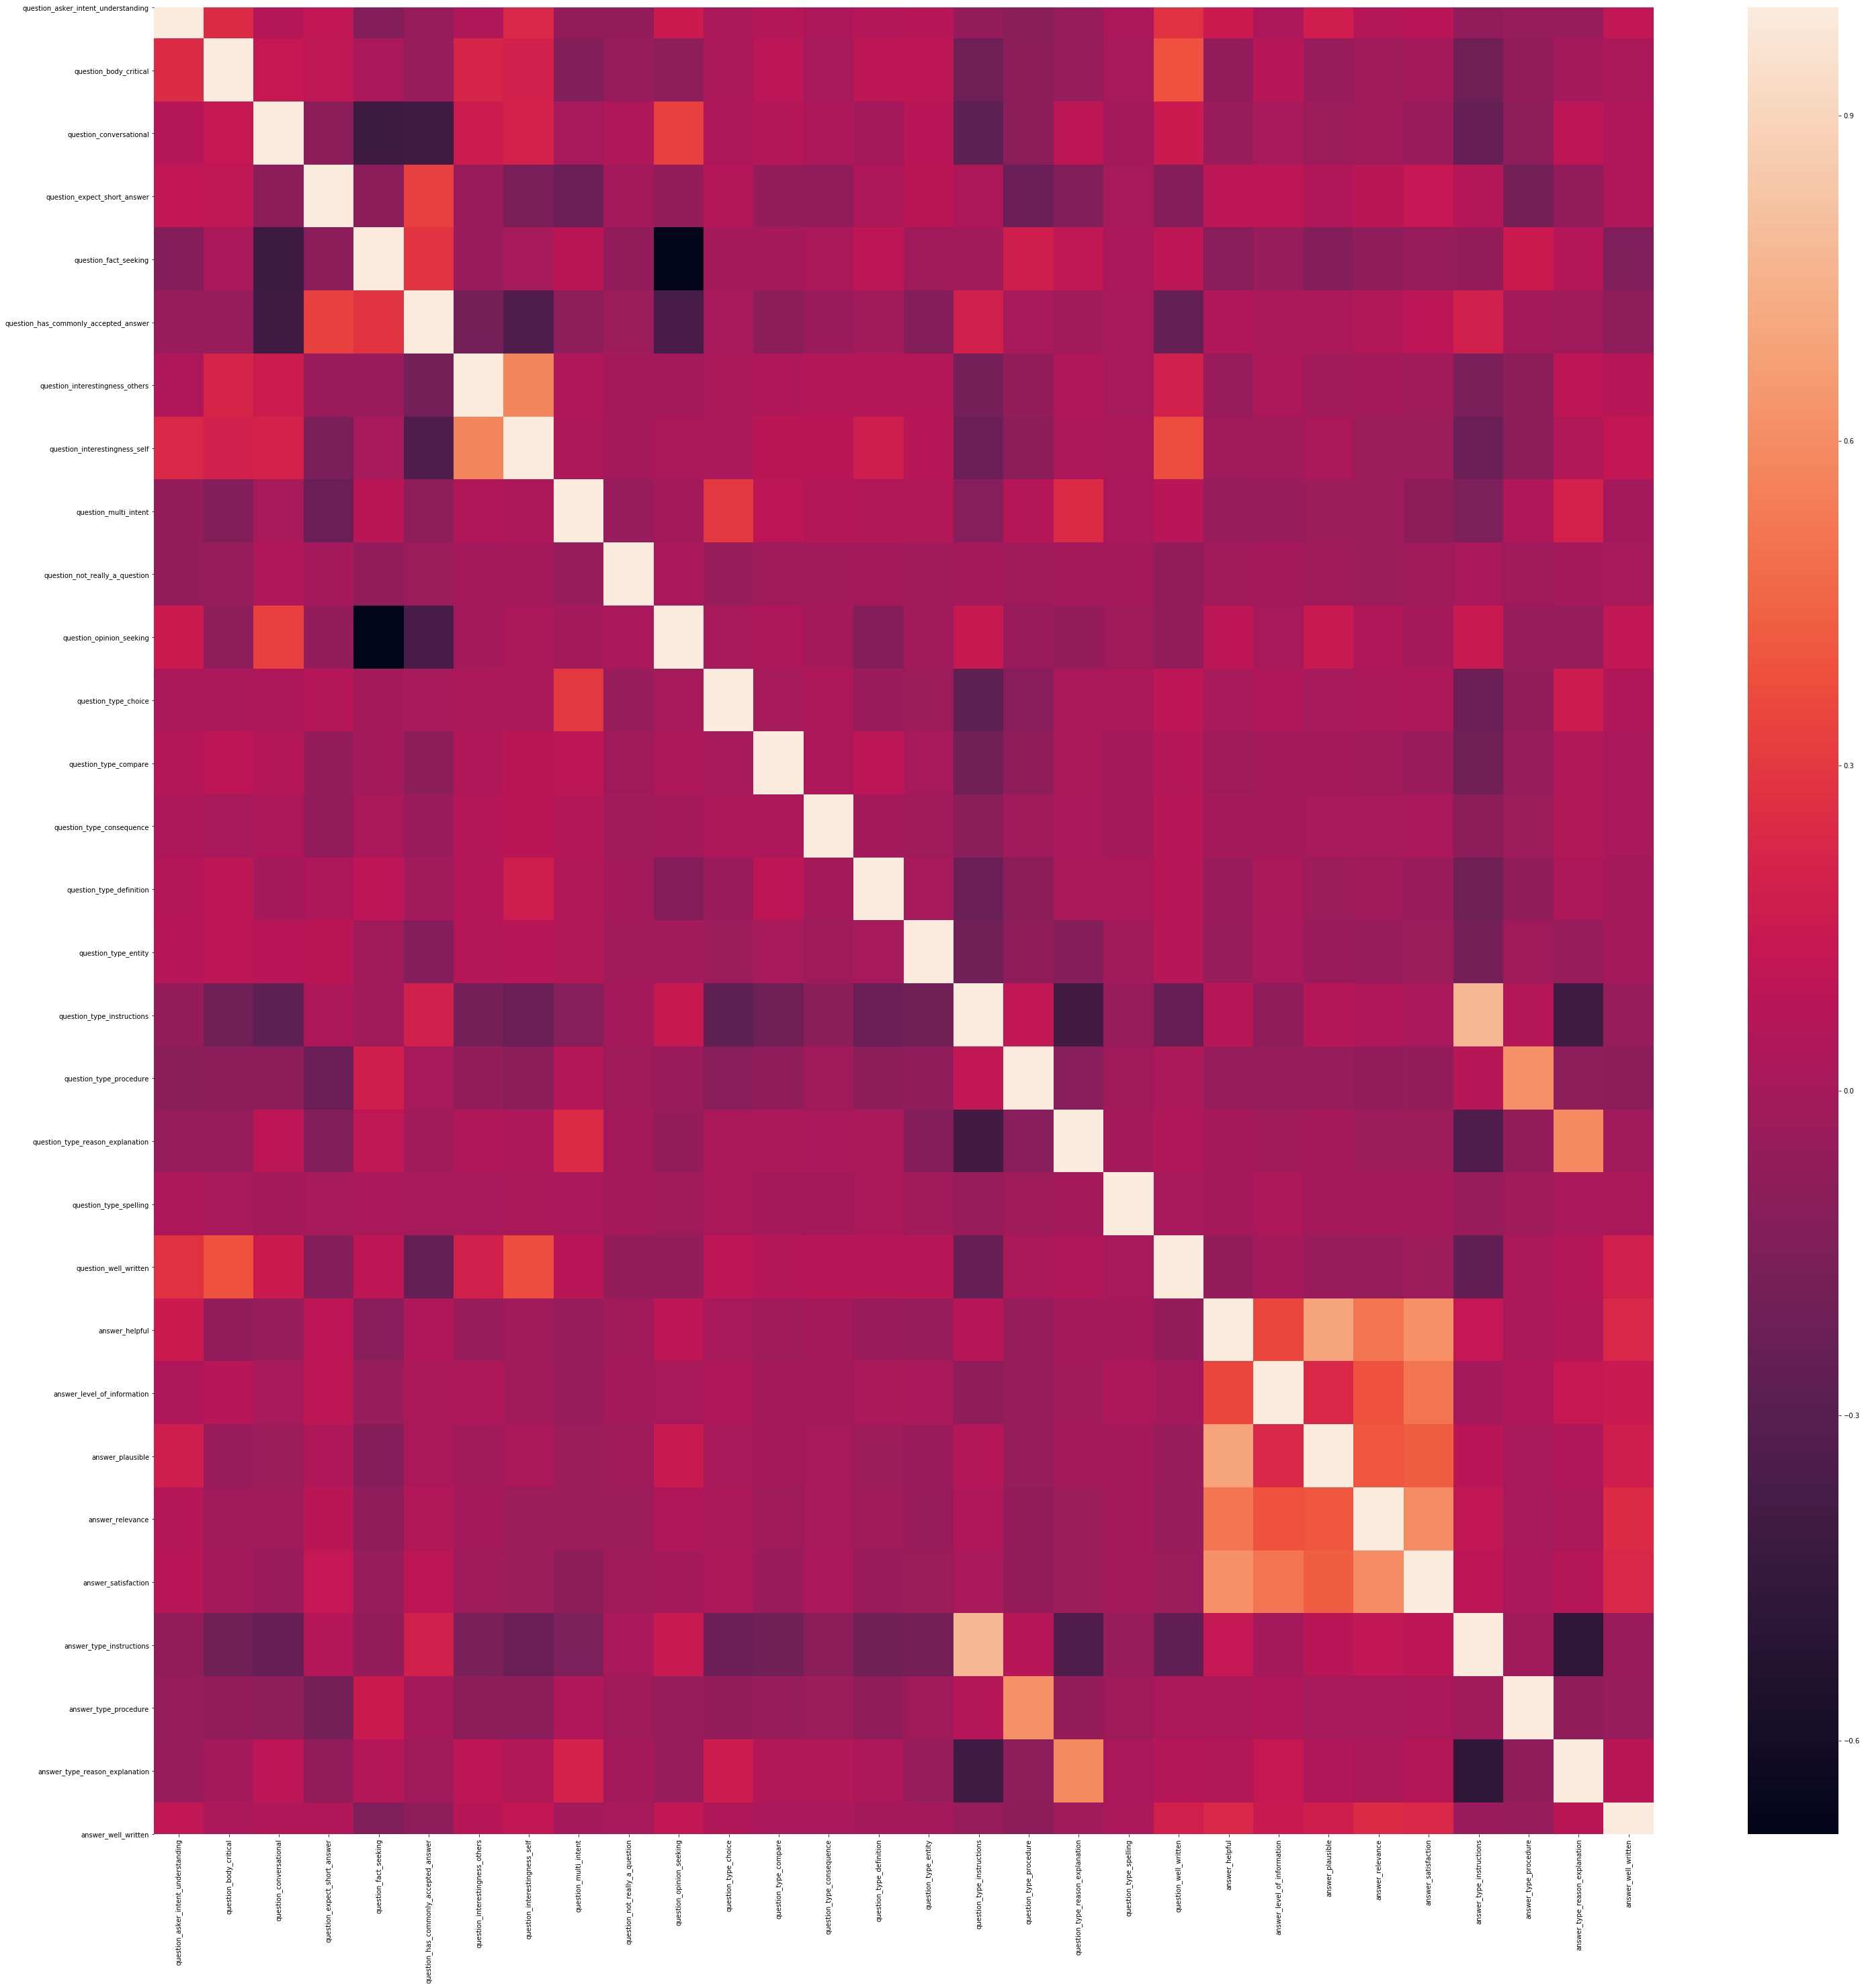

In [23]:
fig = plt.subplots(figsize=(50,50))
sns.heatmap(CORR.corr())

In [24]:
train['question_not_really_a_question'].value_counts()

0.000000    6013
0.333333      48
0.500000      11
0.666667       4
1.000000       3
Name: question_not_really_a_question, dtype: int64

In [26]:
train['question_type_spelling'].value_counts()

0.000000    6068
0.333333       7
0.666667       4
Name: question_type_spelling, dtype: int64

In [27]:
train['question_type_consequence'].value_counts()

0.000000    5948
0.333333      86
0.666667      26
1.000000      11
0.500000       8
Name: question_type_consequence, dtype: int64

In [28]:
train['question_type_definition'].value_counts()

0.000000    5735
0.333333     173
0.666667     110
1.000000      51
0.500000      10
Name: question_type_definition, dtype: int64

In [29]:
train['question_type_compare'].value_counts()

0.000000    5652
0.333333     222
0.666667     119
1.000000      71
0.500000      15
Name: question_type_compare, dtype: int64

In [30]:
train['question_type_reason_explanation'].value_counts()

0.000000    2456
0.333333    1316
1.000000    1171
0.666667    1027
0.500000     109
Name: question_type_reason_explanation, dtype: int64

In [33]:
train['question_not_really_a_question'].sum()/15

1.811111111111111

In [8]:
res = 0
for i in range(479):
    res += (6*(i-239)**2)/(479*(479**2-1))

In [9]:
res

0.5

In [10]:
res = 0
for i in range(479):
    res += i

In [24]:
res/479

239.0

In [30]:
dp = [[] for i in range(5)]
dp[0].append('')

In [31]:
dp

[[''], [], [], [], []]

In [36]:
for i in range(4):
    for j in range(i):
        print(i)

1
2
2
3
3
3
